In [1]:
pip install GitPython

   ---------------------------------------- 0.0/207.3 kB ? eta -:--:--
   ----------- ---------------------------- 61.4/207.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 207.3/207.3 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
   ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from __future__ import print_function
import torch

import torch.optim as optim
from torchvision import datasets, transforms

from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
import utils
import os
import git
from torchsummary import summary

In [2]:
# Clone the repository
git.Repo.clone_from("https://github.com/dusaurabh/Saurabh-ERA-V2-Master.git", "Saurabh-ERA-V2-Master")

<git.repo.base.Repo 'C:\\Users\\Saurabh\\Pytorch\\S10\\Saurabh-ERA-V2-Master\\.git'>

In [12]:
import os
import sys

# Get the full path to the repository directory
repo_path = os.path.abspath('Saurabh-ERA-V2-Master')

# Append the repository path
sys.path.append(repo_path)

# Check the contents of the directory
print(os.listdir(repo_path))

# Try importing the model
from models import ResNet  # Assuming ResNet is defined in models.py
from Miscellaneous import utils

['.git', 'Assignment_10', 'Miscellaneous', 'models', 'One_Cycle_Policy', 'README.md']


In [13]:
from utils import train_transforms, test_transforms, train_test_data_loader, get_training_images

In [14]:
class CIFAR10Dataset(datasets.CIFAR10):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]
        if self.transforms is not None:
          transformed = self.transform(image=image)
          image = transformed["image"]
        return image, label

In [15]:
train = CIFAR10Dataset(root='./data', train=True, transform=train_transforms, download=True)
test = CIFAR10Dataset(root='./data', train=False, transform=test_transforms, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
train_loader, test_loader = train_test_data_loader(train,test)

CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


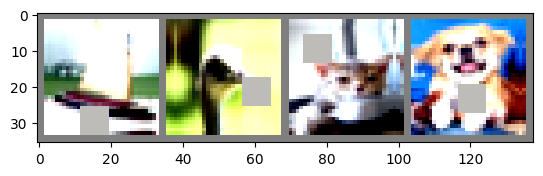

'ship  bird  cat   dog  '

In [17]:
get_training_images(train_loader)

In [19]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet().to(device)
model_copy =  ResNet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 128, 16, 16]         147,456
      BatchNorm2d-14          [-1,

In [20]:
from torch.optim.lr_scheduler import OneCycleLR

LRMIN = 1.91E-01/100 
LRMAX = 1.91E-01 # Value derived from OneCycle Policy Ipython notebook
print('LRMIN ',LRMIN)
print('LRMAX ',LRMAX)

LRMIN  0.00191
LRMAX  0.191


In [21]:
optimizer_copy = optim.Adam(model_copy.parameters(), lr=LRMIN)  # Set initial LR to 0.01
scheduler = OneCycleLR(optimizer_copy, max_lr=LRMAX, total_steps=25, epochs=5, steps_per_epoch=len(train_loader), pct_start=0.3, anneal_strategy='linear', div_factor=10.0, three_phase=False, final_div_factor=1e4, base_momentum=0.85, max_momentum=0.95)

EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    utils.train(model_copy, device, train_loader, optimizer_copy, epoch)
    utils.test(model_copy, device, test_loader)
    scheduler.step()

EPOCH: 0


Loss=2.097559690475464 Batch_id=97 Accuracy=14.23: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s] 



Test set: Average loss: 2.0703, Accuracy: 2137/10000 (21.37%)

EPOCH: 1


Loss=1.630171775817871 Batch_id=97 Accuracy=32.51: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s] 



Test set: Average loss: 1.5433, Accuracy: 4251/10000 (42.51%)

EPOCH: 2


Loss=1.3428928852081299 Batch_id=97 Accuracy=45.15: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 1.3685, Accuracy: 4939/10000 (49.39%)

EPOCH: 3


Loss=1.1755255460739136 Batch_id=97 Accuracy=54.18: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 1.4368, Accuracy: 5343/10000 (53.43%)

EPOCH: 4


Loss=0.9991120100021362 Batch_id=97 Accuracy=59.65: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 1.1625, Accuracy: 5806/10000 (58.06%)

EPOCH: 5


Loss=1.0908288955688477 Batch_id=97 Accuracy=61.46: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]



Test set: Average loss: 1.1484, Accuracy: 5795/10000 (57.95%)

EPOCH: 6


Loss=0.9051278233528137 Batch_id=97 Accuracy=64.27: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 0.9351, Accuracy: 6749/10000 (67.49%)

EPOCH: 7


Loss=0.9968487024307251 Batch_id=97 Accuracy=67.73: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.8061, Accuracy: 7198/10000 (71.98%)

EPOCH: 8


Loss=0.6962960958480835 Batch_id=97 Accuracy=71.69: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.7487, Accuracy: 7474/10000 (74.74%)

EPOCH: 9


Loss=0.7729271650314331 Batch_id=97 Accuracy=73.62: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]



Test set: Average loss: 0.7295, Accuracy: 7487/10000 (74.87%)

EPOCH: 10


Loss=0.7797805070877075 Batch_id=97 Accuracy=75.01: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]



Test set: Average loss: 0.6463, Accuracy: 7818/10000 (78.18%)

EPOCH: 11


Loss=0.6954625844955444 Batch_id=97 Accuracy=76.78: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]



Test set: Average loss: 0.7093, Accuracy: 7586/10000 (75.86%)

EPOCH: 12


Loss=0.6656419038772583 Batch_id=97 Accuracy=78.14: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.7174, Accuracy: 7447/10000 (74.47%)

EPOCH: 13


Loss=0.6181319952011108 Batch_id=97 Accuracy=79.06: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.5944, Accuracy: 7989/10000 (79.89%)

EPOCH: 14


Loss=0.5807711482048035 Batch_id=97 Accuracy=80.06: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s] 



Test set: Average loss: 0.5704, Accuracy: 8055/10000 (80.55%)

EPOCH: 15


Loss=0.5352509617805481 Batch_id=97 Accuracy=81.13: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s] 



Test set: Average loss: 0.5108, Accuracy: 8286/10000 (82.86%)

EPOCH: 16


Loss=0.4953555464744568 Batch_id=97 Accuracy=82.09: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s] 



Test set: Average loss: 0.5637, Accuracy: 8067/10000 (80.67%)

EPOCH: 17


Loss=0.49142318964004517 Batch_id=97 Accuracy=83.08: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]



Test set: Average loss: 0.5067, Accuracy: 8309/10000 (83.09%)

EPOCH: 18


Loss=0.5063279867172241 Batch_id=97 Accuracy=83.75: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s] 



Test set: Average loss: 0.4538, Accuracy: 8477/10000 (84.77%)

EPOCH: 19


Loss=0.46059125661849976 Batch_id=97 Accuracy=84.50: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.4381, Accuracy: 8514/10000 (85.14%)

EPOCH: 20


Loss=0.39671480655670166 Batch_id=97 Accuracy=85.16: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]



Test set: Average loss: 0.4361, Accuracy: 8537/10000 (85.37%)

EPOCH: 21


Loss=0.4503440260887146 Batch_id=97 Accuracy=85.85: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s] 



Test set: Average loss: 0.4048, Accuracy: 8666/10000 (86.66%)

EPOCH: 22


Loss=0.4084394574165344 Batch_id=97 Accuracy=86.87: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s] 



Test set: Average loss: 0.3874, Accuracy: 8705/10000 (87.05%)

EPOCH: 23


Loss=0.3948969542980194 Batch_id=97 Accuracy=87.37: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s] 



Test set: Average loss: 0.3632, Accuracy: 8801/10000 (88.01%)

EPOCH: 24


Loss=0.35955989360809326 Batch_id=97 Accuracy=88.09: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]



Test set: Average loss: 0.3628, Accuracy: 8805/10000 (88.05%)



# Target

1. Write a Architecture like
	1. PrepLayer - Conv 3x3 s1, p1) >> BN >> RELU [64k]
    
	2. Layer1 -
		1. X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [128k]
		2. R1 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [128k]
		3. Add(X, R1)
     
	3. Layer 2 -
		1. Conv 3x3 [256k]
		2. MaxPooling2D
		3. BN
		4. ReLU
     
	4. Layer 3 
		1. X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [512k]
		2. R2 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [512k]
		3. Add(X, R2)
     
	5. MaxPooling with Kernel Size 4
    
	6. FC Layer
    
	7. SoftMax
2. Uses One Cycle Policy such that:
	1. Total Epochs = 24
	2. Max at Epoch = 5
	3. LRMIN = FIND
	4. LRMAX = FIND
	5. NO Annihilation

3. Uses this transform -RandomCrop 32, 32 (after padding of 4) >> FlipLR >> Followed by CutOut(8, 8)
4. Batch size = 512
5. Use ADAM and CrossEntropyLoss
6. Target Accuracy: 90%
7. NO score if your code is not modular. Your collab must be importing your GitHub package, and then just running the model. 
	I should be able to find the custom_resnet.py model in your MASTER GitHub repo that you'd be training. repo that you'd be training. yLoss
Target Accuracy: 90%

# Result

1. Parameters: 6,614,080

2. Best Train Accuracy: 88.09% at 24th epoch
   
3. Best Test Accuracy: 88.05 at 24th epochh)

# Analysis

1. We have implemented our model like ResNet architecture

2. We implemented Adam optimizer and CrossEntropyLoss and got higher and faster accuracy according to our model architecture and problem statment

3. Used albumentation transformation library of RandomCrop 32, 32 (after padding of 4) >> FlipLR >> Followed by CutOut(8, 8)

4. If we train our model for higher epoch then we can get slighlty more accuracy